# importing require libraries and reading require dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("heart.csv")
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# understanding dataset

Here we will read dataset and try to understand what data is all about

In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

so that is great data has no null values

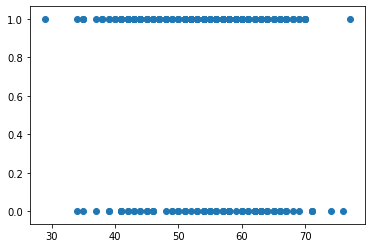

In [6]:
plt.scatter(dataset["age"],dataset["sex"])


Mens have much higher age as compared to females expect some outlier values



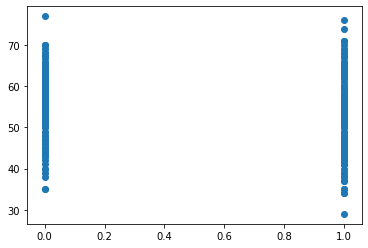

In [7]:
plt.scatter(dataset["target"],dataset["age"])


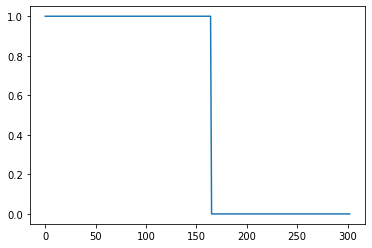

In [8]:
plt.plot(dataset["target"])

In [9]:
(dataset["target"]==1).sum()

165

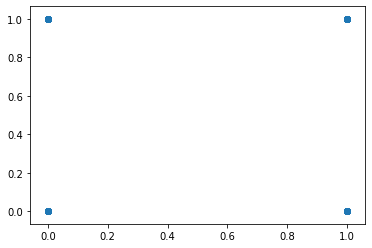

In [10]:
plt.scatter(dataset["sex"],dataset["target"])

(array([143.,   0.,   0.,  50.,   0.,   0.,  87.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

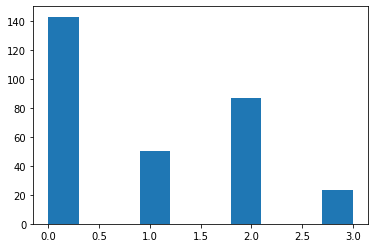

In [11]:
plt.hist(dataset["cp"])

cp has most values at 0 and least at3 

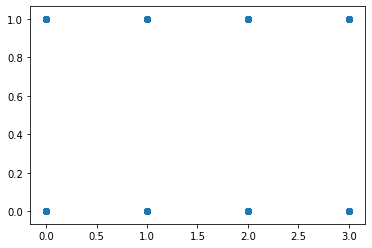

In [12]:
plt.scatter(dataset["cp"],dataset["target"])

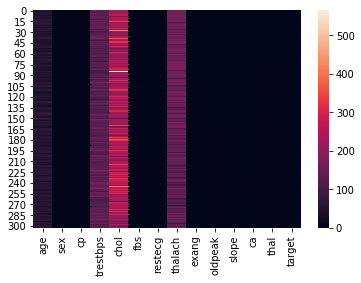

In [13]:
import seaborn as sns 
sns.heatmap(dataset)

In [14]:
#sns.pairplot(data=dataset, hue="target")
# i have comment above line as i vie wthe output but it is very time consumingso i comment it

# Randomforest modeling

In [15]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=dataset
y=dataset["target"]
X.drop(columns=['target'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)


In [17]:
scaler = preprocessing.MinMaxScaler()
X_scaled = preprocessing.scale(X_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=750,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_scaled,y_train)

C:\Users\M.Hasnain Baloch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
test_scaled = preprocessing.scale(X_test)

# Test data evalution

In [20]:
pre=clf.predict(test_scaled)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, pre))
f1_score(y_test,pre)

[[34 10]
 [ 8 39]]


0.8125

# Train data evalution

In [22]:

pre=clf.predict(X_scaled)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(confusion_matrix(y_train, pre))
print(f1_score(y_train,pre))

[[ 93   1]
 [  4 114]]
0.9785407725321889


Random forest has given 0.8717948717948718 and 1.0 f1-score for test and train data respectively

# Knn classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_scaled,y_train)
pre=classifier.predict(test_scaled)

# Evaluation of knn

In [25]:
print(confusion_matrix(y_test, pre))
print(f1_score(y_test,pre))
pre=clf.predict(X_scaled)
print(confusion_matrix(y_train, pre))
print(f1_score(y_train,pre))

[[33 11]
 [ 4 43]]
0.8514851485148516
[[ 93   1]
 [  4 114]]
0.9785407725321889


In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y_train)
    pred_i = knn.predict(test_scaled)
    error.append(np.mean(pred_i != y_test))
min = error[0];    
result=0     
#Loop through the array    
for i in range(0, len(error)):    
    #Compare elements of array with min    
    if(error[i] < min):
        min=error[i]
        result=i
    

Text(0, 0.5, 'Mean Error')

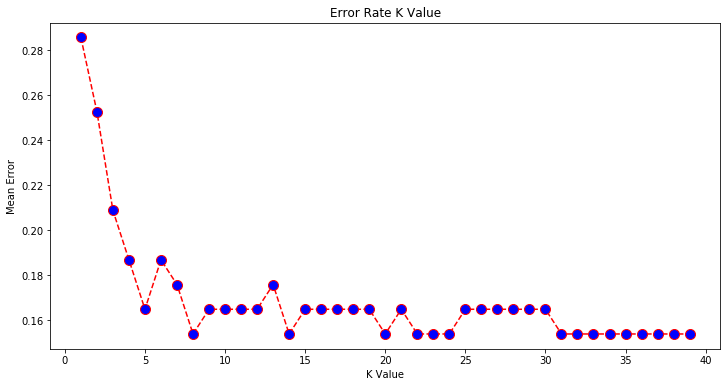

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=result)
classifier.fit(X_scaled,y_train)
pre=classifier.predict(test_scaled)
print(confusion_matrix(y_test, pre))
print(f1_score(y_test,pre))
pre=clf.predict(X_scaled)
print(confusion_matrix(y_train, pre))
print(f1_score(y_train,pre))

[[31 13]
 [ 3 44]]
0.8461538461538461
[[ 93   1]
 [  4 114]]
0.9785407725321889


7